In [1]:
import pandas as pd
import matplotlib as mlp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
trainingdf = pd.read_csv('./data/training_set_VU_DM.csv')

In [3]:
print('number of columns:', len(trainingdf.columns))
print('number of rows:', len(trainingdf.index))
print('number of unique ids:', trainingdf['srch_id'].nunique())

number of columns: 54
number of rows: 4958347
number of unique ids: 199795


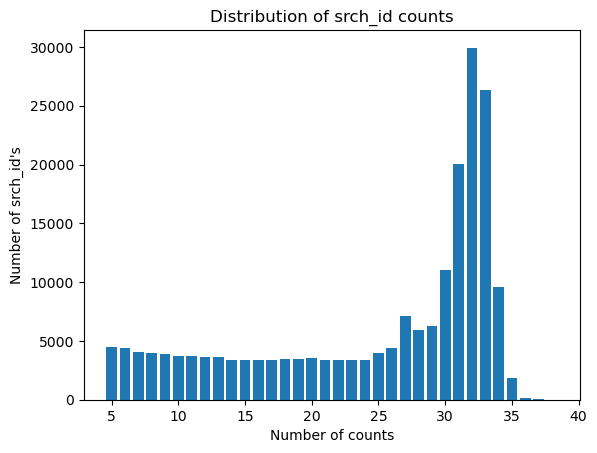

In [33]:
# trainingdf.groupby('srch_id')['click_bool'].count()
counts = trainingdf['srch_id'].value_counts()
count_values = counts.value_counts()

plt.bar(count_values.index, count_values.values)
plt.xlabel('Number of counts')
plt.ylabel('Number of srch_id\'s')
plt.title('Distribution of srch_id counts')
plt.show()
#make a distribution plot with ontly the counts of the srch_id's. On the x-axis the number of counts and on the y-axis the number of srch_id's with that count


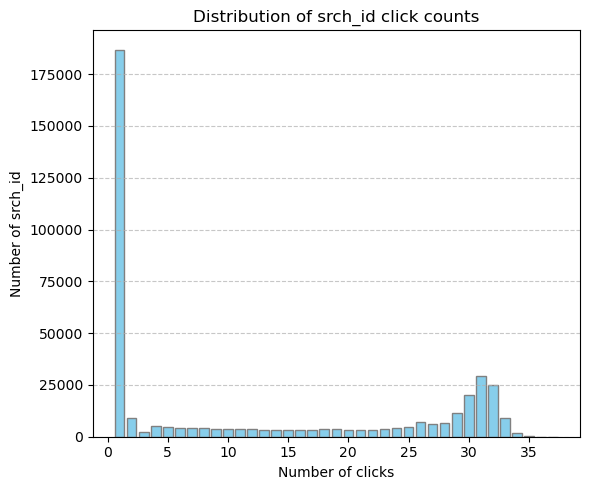

In [40]:
countclick = trainingdf.groupby('srch_id')['click_bool'].value_counts()
countclick_values = countclick.value_counts()

plt.figure(figsize=(6, 5))  # Adjust the figure size as needed

plt.bar(countclick_values.index, countclick_values.values, color='skyblue', edgecolor='gray')
plt.xlabel('Number of clicks')
plt.ylabel('Number of srch_id')
plt.title('Distribution of srch_id click counts')

# Customize the grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # Adjust the spacing
plt.show()

/Users/florencecornelissen/opt/anaconda3/envs/DMT2023/lib/python3.10/site-packages/numpy/ma/core.py:2826: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


ValueError: setting an array element with a sequence.

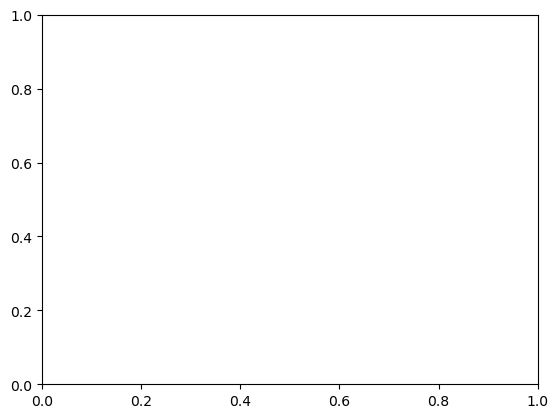

In [46]:
# Group by srch_id and calculate the sum of click_bool and booking_bool
grouped = trainingdf.groupby('srch_id')[['click_bool', 'booking_bool']].sum()

# Get the total count of click_bool and booking_bool per srch_id
click_counts = grouped['click_bool']
booking_counts = grouped['booking_bool']

# Create a scatter plot
plt.scatter(click_counts, booking_counts, color='skyblue', alpha=0.7)
plt.xlabel('Total count of click_bool per srch_id')
plt.ylabel('Total count of booking_bool per srch_id')
plt.title('Relation between click_bool and booking_bool')

plt.show()


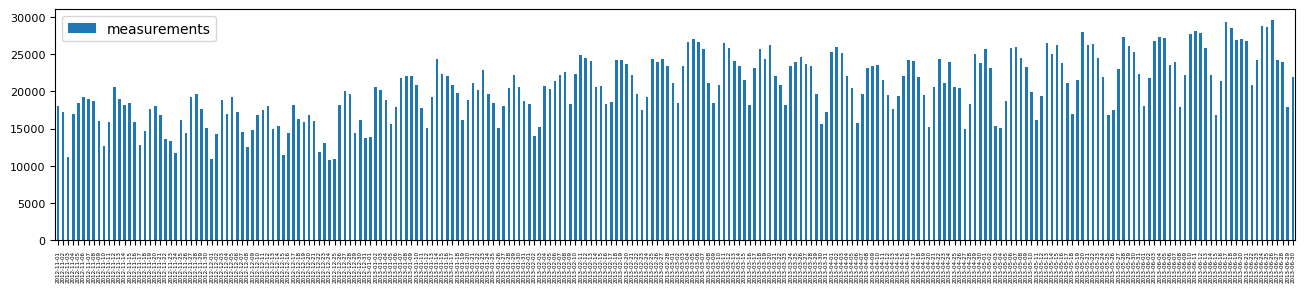

In [24]:
timespan = pd.to_datetime(trainingdf['date_time']).dt.date.value_counts()
timespanbar = timespan.to_frame()
timespanbar = timespanbar.sort_index()

timespanbar = timespanbar.rename(columns={timespanbar.columns[0]: 'measurements'})
# plt.xticks(fontsize=3)
# plt.yticks(fontsize=8)
# plt.figsize=(16,3)
# plt.bar(timespanbar.index, timespanbar['measurements'], color='grey')
# plt.show()
barplottime = timespanbar.plot(figsize=(16,3), fontsize=3, kind='bar')
barplottime.tick_params(axis='y', labelsize=8)

# Set the font size for y-axis ticks
barplottime.tick_params(axis='x', labelsize=4)

plt.show()


In [27]:
pd.to_datetime(trainingdf['date_time']).dt.date.value_counts()
# pd.to_datetime(trainingdf['date_time']).dt.date.nunique()

2013-06-26    29551
2013-06-17    29365
2013-06-24    28844
2013-06-25    28695
2013-06-18    28465
              ...  
2012-12-15    11391
2012-11-03    11134
2012-12-01    10974
2012-12-25    10932
2012-12-24    10738
Name: date_time, Length: 242, dtype: int64

In [34]:
begin = pd.to_datetime(trainingdf['date_time']).dt.date.min()
end = pd.to_datetime(trainingdf['date_time']).dt.date.max()
delta = begin - end
print(begin)
print(end)
print(delta.days) #answer is +1 since day itself counts as well (see above)

2012-11-01
2013-06-30
-241


In [46]:
q_low = int(trainingdf["price_usd"].quantile(0.001))
q_hi  = int(trainingdf["price_usd"].quantile(0.999))

print(q_low, q_hi)


14 2060


(array([1.49560e+04, 3.19610e+04, 7.80310e+04, 1.78974e+05, 2.59676e+05,
        2.99504e+05, 3.34130e+05, 3.49453e+05, 3.56561e+05, 3.20270e+05,
        2.95518e+05, 2.67573e+05, 2.38933e+05, 2.03981e+05, 1.79916e+05,
        1.59102e+05, 1.43192e+05, 1.24694e+05, 1.23908e+05, 9.21940e+04,
        8.22740e+04, 7.91300e+04, 6.59730e+04, 6.52040e+04, 5.46070e+04,
        4.96710e+04, 4.39040e+04, 3.84360e+04, 4.34030e+04, 3.04840e+04,
        2.67750e+04, 2.68200e+04, 2.15760e+04, 2.25780e+04, 1.98310e+04,
        1.72040e+04, 1.48220e+04, 1.49490e+04, 1.64900e+04, 1.11740e+04,
        1.10150e+04, 9.79200e+03, 8.54600e+03, 9.01100e+03, 7.41100e+03,
        6.80600e+03, 6.01800e+03, 6.70700e+03, 7.11800e+03, 4.52700e+03,
        4.82000e+03, 3.90400e+03, 3.88100e+03, 3.77100e+03, 2.97700e+03,
        2.92500e+03, 2.70100e+03, 2.98100e+03, 3.14200e+03, 1.93200e+03,
        2.13600e+03, 1.91200e+03, 1.76300e+03, 1.75500e+03, 1.47400e+03,
        1.74400e+03, 1.28200e+03, 1.49900e+03, 1.46

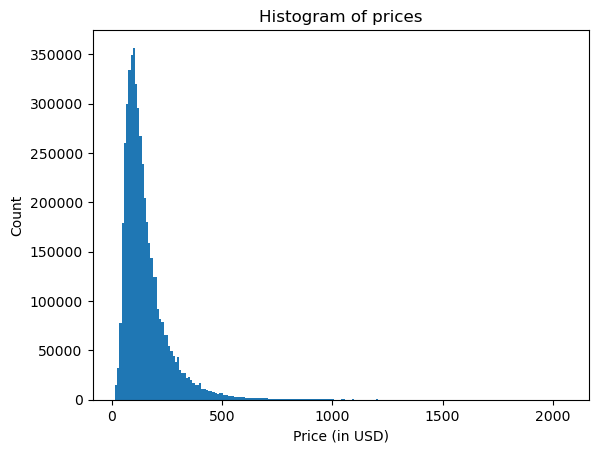

In [52]:
plt.xlabel('Price (in USD)')
plt.ylabel('Count')
plt.title('Histogram of prices')
plt.hist(trainingdf['price_usd'], bins=int((q_hi-q_low)/10), range=(q_low,q_hi))

(array([ 233294.,       0.,   13303.,   14465.,   62301.,  143886.,
         375905.,  768054., 1556948., 1782827.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

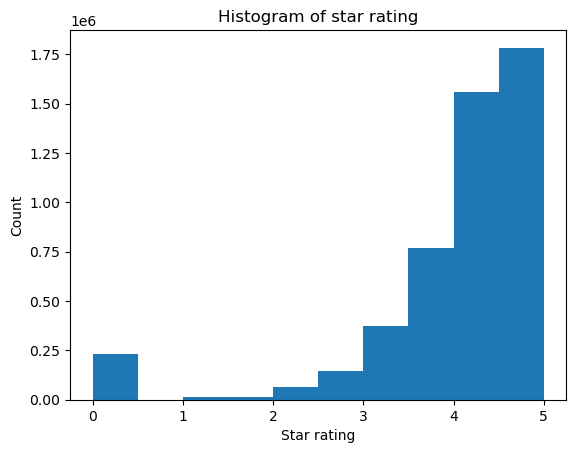

In [53]:
plt.title('Histogram of star rating')
plt.xlabel('Star rating')
plt.ylabel('Count')
plt.hist(trainingdf['prop_review_score'])

/var/folders/0d/s7f5w3y14tjdxlssm2bbvqjc0000gn/T/ipykernel_28234/1175351540.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  _ = sns.heatmap(trainingdf.corr(),


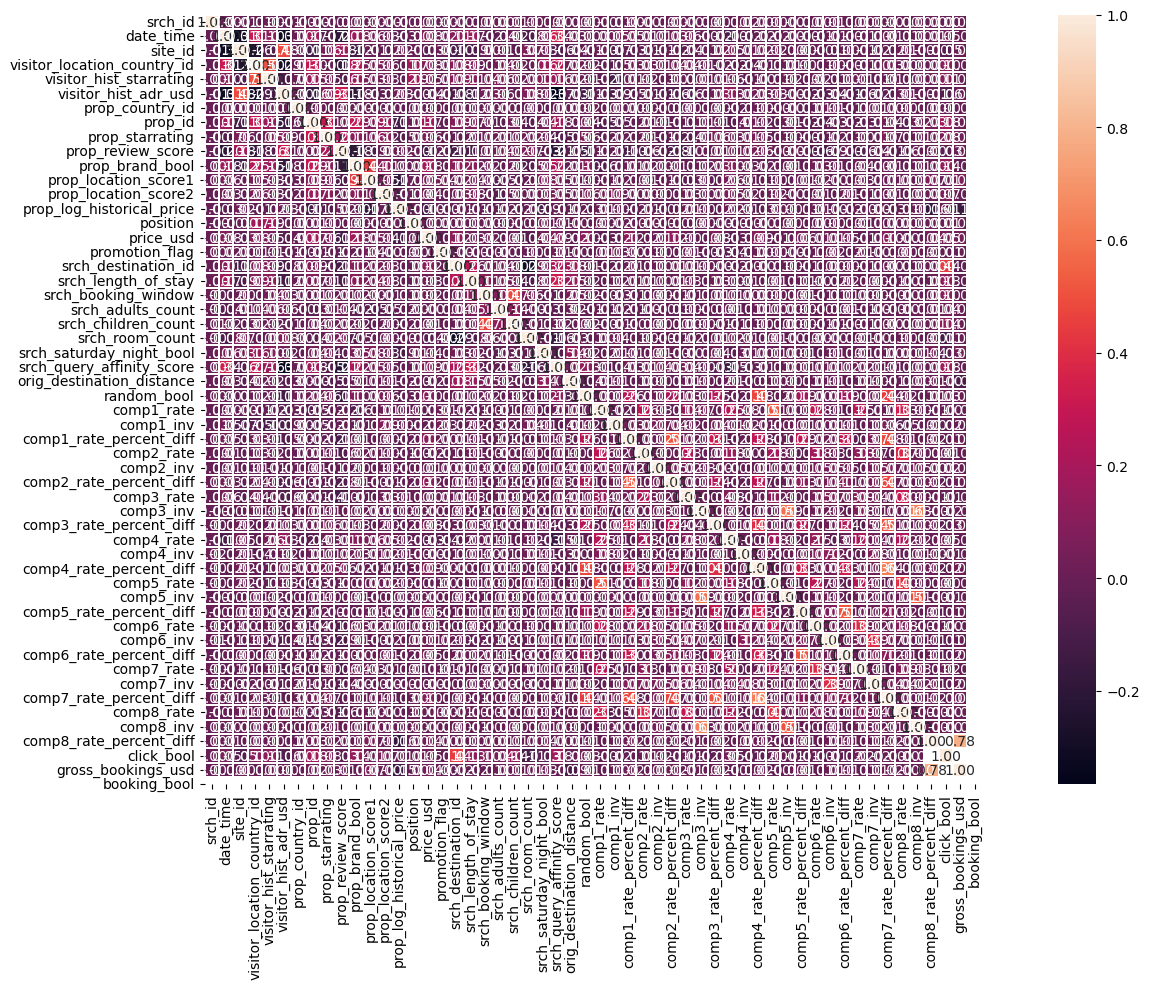

In [56]:
plt.rcParams["figure.figsize"] = (17,10)
_ = sns.heatmap(trainingdf.corr(),
                 yticklabels=list(trainingdf.columns),
                 xticklabels=list(trainingdf.columns),
                 annot=True,
                 fmt='.2f',
                 square=True,
                 linewidths=0.05,
                 cbar_kws={"orientation": "vertical"})
plt.tight_layout()

/var/folders/0d/s7f5w3y14tjdxlssm2bbvqjc0000gn/T/ipykernel_28234/2212352331.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  trainingcor = trainingdf.corr()


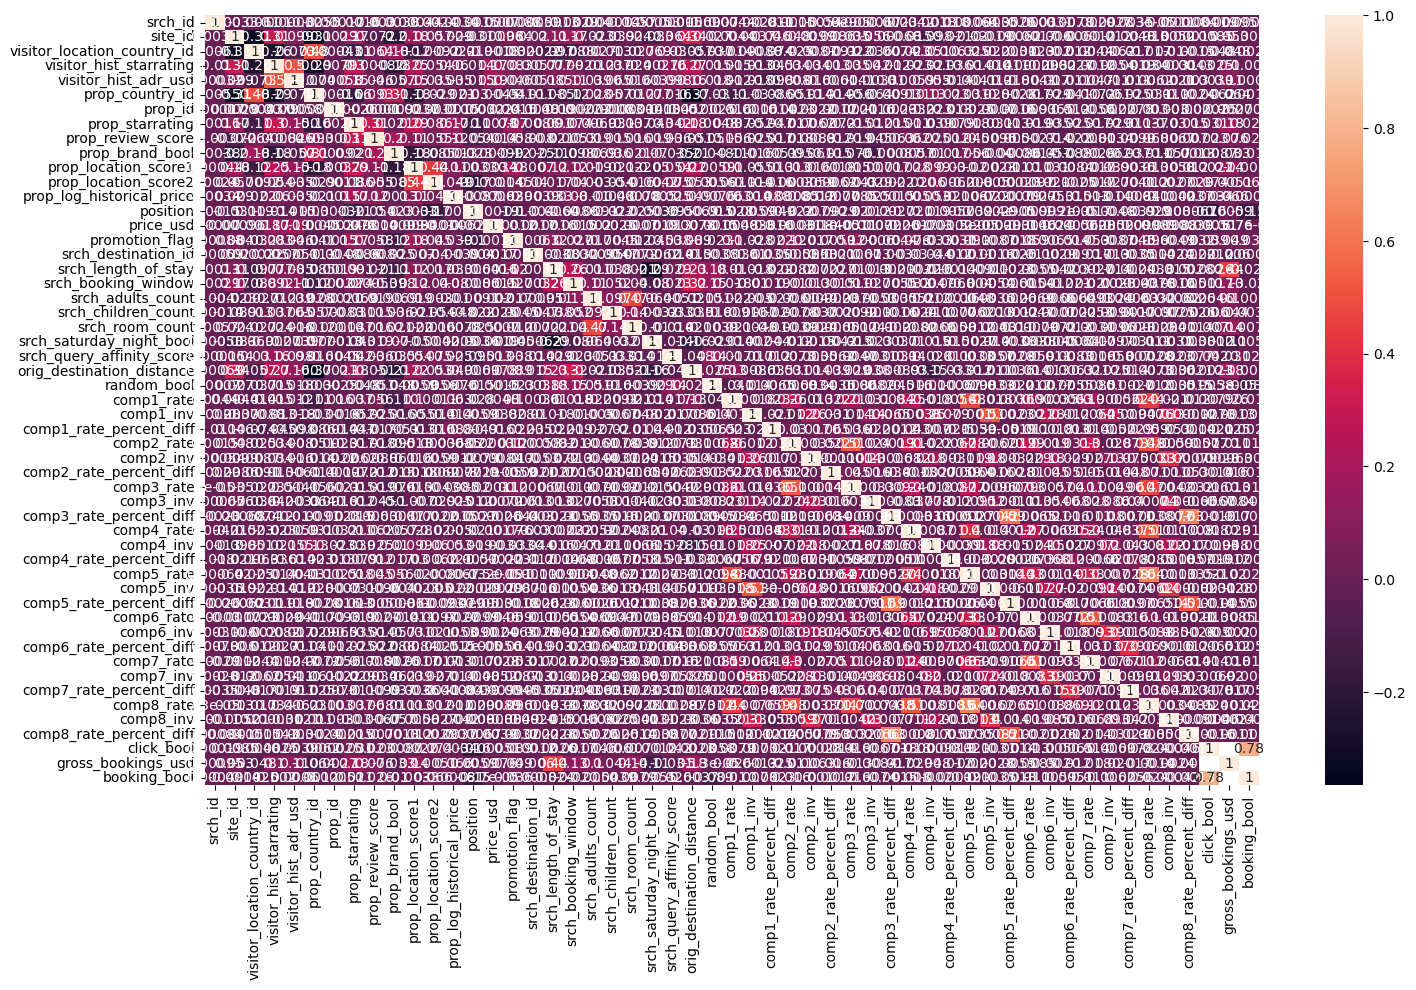

In [58]:
trainingcor = trainingdf.corr()
sns.heatmap(trainingcor, annot=True)
plt.show()

In [26]:
trainingdf['booking_bool'].value_counts()

0    4819957
1     138390
Name: booking_bool, dtype: int64

In [27]:
trainingdf['gross_bookings_usd'].value_counts()

89.99      43
112.03     42
133.69     39
113.66     37
231.85     36
           ..
316.19      1
34.23       1
577.31      1
1301.39     1
1257.24     1
Name: gross_bookings_usd, Length: 60687, dtype: int64

NameError: name 'trainingdf' is not defined